In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weldright/WeldRight Dataset.xlsx
/kaggle/input/weldright-prepared/WeldRight Dataset.csv


In [2]:
data = pd.read_csv('../input/weldright-prepared/WeldRight Dataset.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,Unnamed: 0,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect
0,1,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:28:527,1.13,74,23,0.01,29.3,15.2,No Defect,NaN
1,2,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:40,1.82,74,23,0.00,29.3,0.0,Tungsten Inclusion,NaN
2,3,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:677,2.91,74,23,0.00,29.3,0.0,No Defect,NaN
3,4,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:166,0.04,74,23,0.00,29.3,0.0,No Defect,NaN
4,5,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:696,2.51,74,23,0.00,27.8,0.0,No Defect,NaN


In [4]:
data.shape

(827534, 15)

In [5]:
def conditions(s):
    if (s['Defect'] == "No Defect"):
        return 0
    else:
        return 1


In [6]:
data['isDefect'] = data.apply(conditions, axis=1)

In [7]:
data.head()

,Unnamed: 0,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect
0,1,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:28:527,1.13,74,23,0.01,29.3,15.2,No Defect,0
1,2,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:40,1.82,74,23,0.00,29.3,0.0,Tungsten Inclusion,1
2,3,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:677,2.91,74,23,0.00,29.3,0.0,No Defect,0
3,4,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:166,0.04,74,23,0.00,29.3,0.0,No Defect,0
4,5,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:696,2.51,74,23,0.00,27.8,0.0,No Defect,0


In [8]:
data[data['Defect']!='No Defect']

,Unnamed: 0,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect
1,2,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:40,1.82,74,23,0.00,29.3,0.000,Tungsten Inclusion,1
36,37,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:47:696,25.01,74,23,0.00,28.1,5.501,Tungsten Inclusion,1
37,38,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:48:300,8.20,74,23,0.00,28.1,-2.008,Tungsten Inclusion,1
42,43,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:51:1,15.02,74,23,0.00,101.6,5.000,Tungsten Inclusion,1
43,44,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:51:602,25.00,74,23,0.00,101.6,8.019,Tungsten Inclusion,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827013,827014,391342,TWLD23,15003062,240,2022-08-29 00:00:00,22:57:22:734,27.96,57,24,0.04,40.3,11.514,Porosity,1
827124,827125,391342,TWLD23,15003062,240,2022-08-29 00:00:00,22:58:25:841,2.29,57,24,0.00,42.6,0.000,Tungsten Inclusion,1
827232,827233,391342,TWLD23,15003062,240,2022-08-29 00:00:00,22:59:26:646,18.08,57,24,0.00,38.4,13.105,Tungsten Inclusion,1
827233,827234,391342,TWLD23,15003062,240,2022-08-29 00:00:00,22:59:27:159,21.53,57,24,0.00,38.4,12.280,Tungsten Inclusion,1


In [9]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
data.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect
0,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:28:527,1.13,74,23,0.01,29.3,15.2,No Defect,0
1,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:40,1.82,74,23,0.00,29.3,0.0,Tungsten Inclusion,1
2,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:677,2.91,74,23,0.00,29.3,0.0,No Defect,0
3,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:166,0.04,74,23,0.00,29.3,0.0,No Defect,0
4,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:696,2.51,74,23,0.00,27.8,0.0,No Defect,0


In [11]:
data['Order Operation No'].unique()

array(['240', '-240', '-', '130', 130, 240, 180, 40, 30, 1, '1', '180-'],
      dtype=object)

In [12]:
len(data['Date'].unique())

24

In [13]:
data.isnull().sum()

Employee Code              0
Machine                    0
Production            278180
Order Operation No         0
Date                       0
Time                       0
Current                    3
Humidity                   0
Temperature                0
Flow                       0
Job Temp                   0
Voltage                    0
Defect                     0
isDefect                   0
dtype: int64

In [14]:
data['Employee Code'].unique()

array([382617, 391342,  97346,      0, 394965, 387268, 394365, 383138,
       394269])

In [15]:
data['Machine'].unique()

array(['TWLD23'], dtype=object)

In [16]:
data['Production'].unique()

array(['E15002965', 'E15002966', nan, '-', '15003062', 'E15003220',
       'E15002881', 'E10002436', 'E50006711', 'E15003200', 'E15003202',
       'E15003056', 'E15002963', 'E10002437', 'E15003219', 'E15003201',
       'Test coopan', '-15003217', -15003217, -150033027, 15003062],
      dtype=object)

In [17]:
data['Order Operation No'].unique()

array(['240', '-240', '-', '130', 130, 240, 180, 40, 30, 1, '1', '180-'],
      dtype=object)

In [18]:
# Importing necessary libraries for understanding data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

plt.style.use('fivethirtyeight')

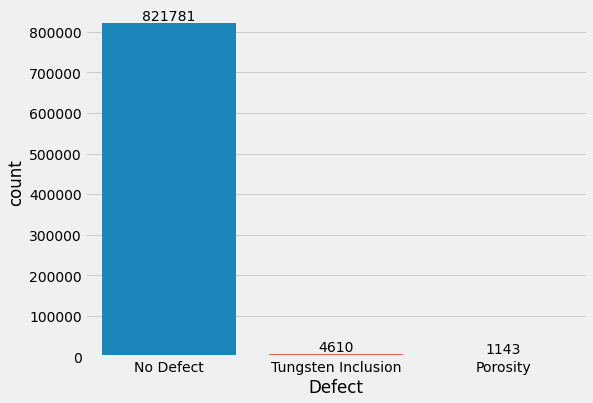

In [19]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=data,x='Defect')
ax.bar_label(ax.containers[0])
plt.show()

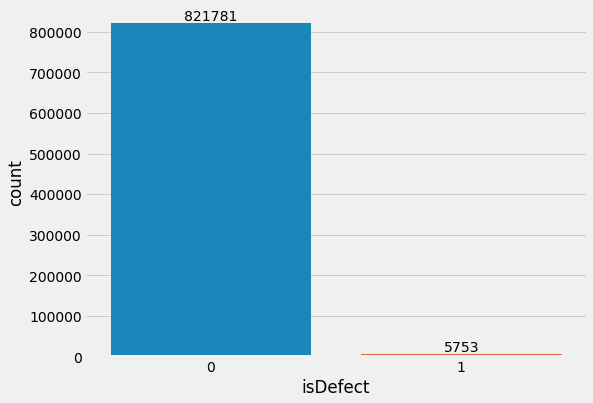

In [20]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=data,x='isDefect')
ax.bar_label(ax.containers[0])
plt.show()

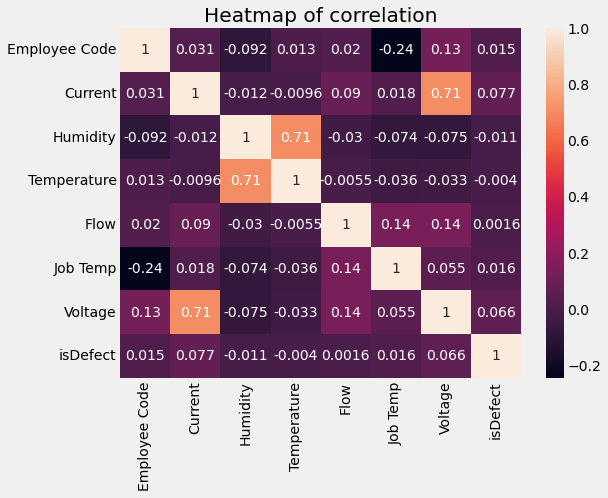

In [21]:


#Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(data=data.corr(),annot=True)
plt.title('Heatmap of correlation')
plt.show()



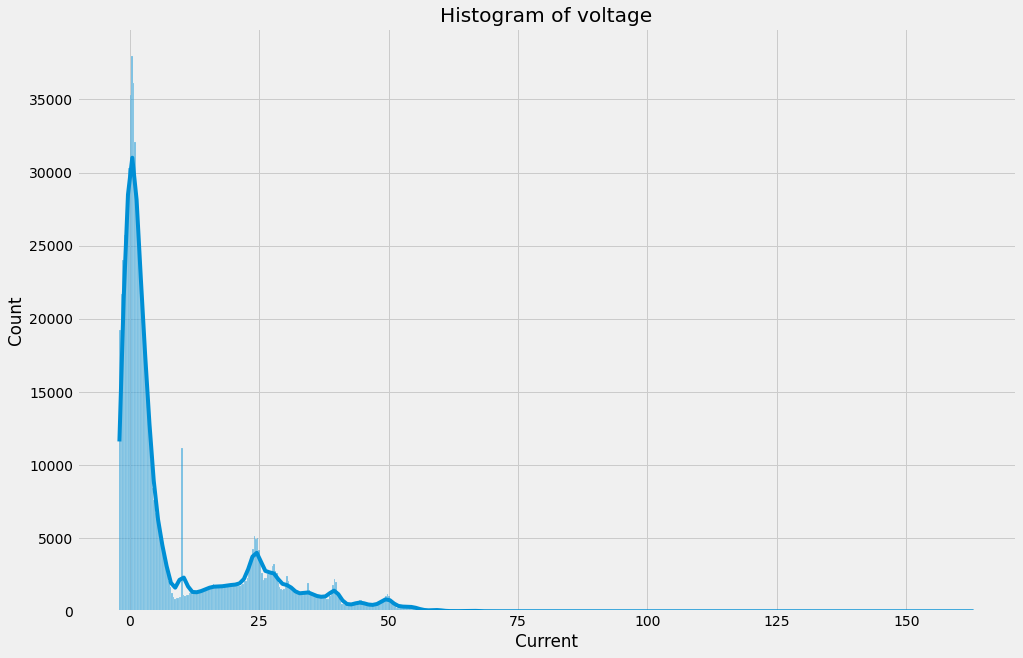

In [22]:
plt.figure(figsize=(15,10))
sns.histplot(data=data,x='Current',kde=True)
plt.title('Histogram of voltage')
plt.show()

In [23]:
data['Current'].nunique()

6818

In [24]:
data['Flow'].nunique()

1009

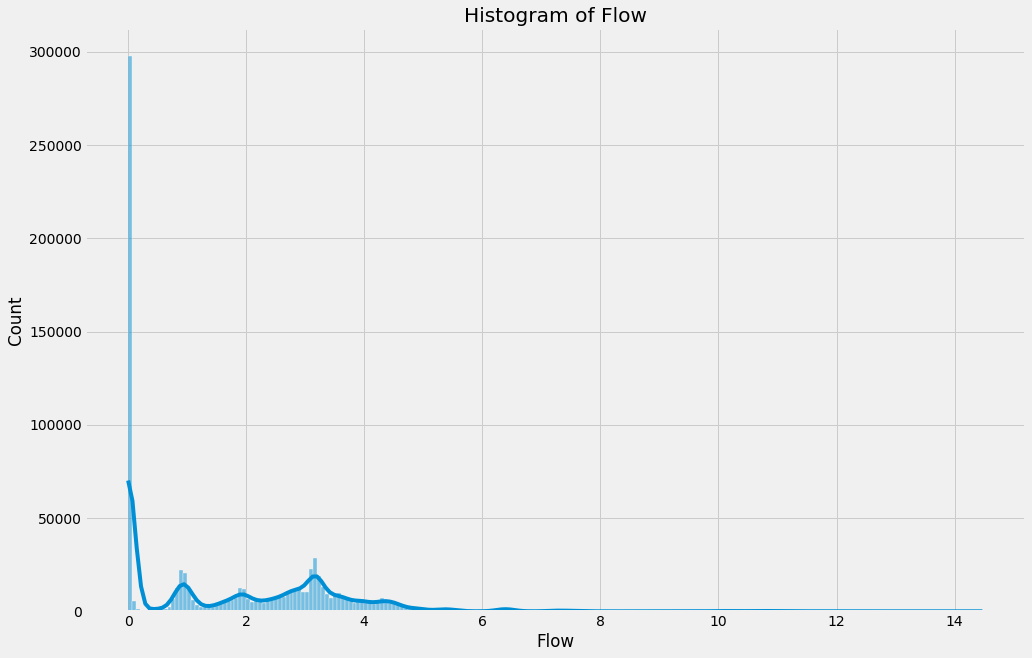

In [25]:
plt.figure(figsize=(15,10))
sns.histplot(data=data,x='Flow',kde=True)
plt.title('Histogram of Flow')
plt.show()

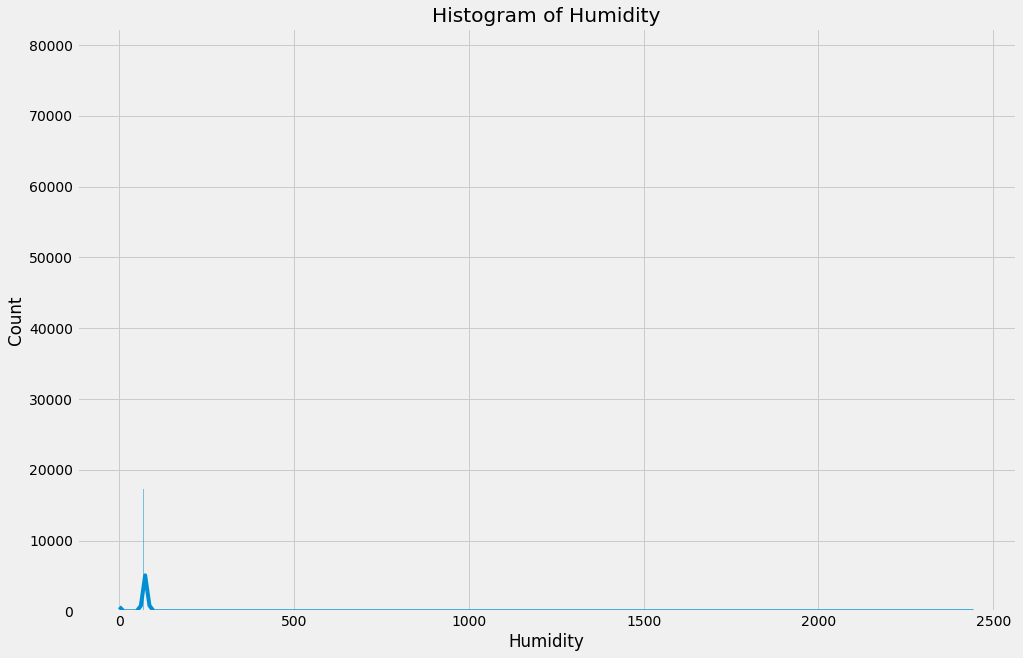

In [26]:
plt.figure(figsize=(15,10))
sns.histplot(data=data,x='Humidity',kde=True)
plt.title('Histogram of Humidity')
plt.show()

In [27]:
data[data['Production'] == "-15003217"]

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect
714994,97346,TWLD23,-15003217,180-,2022-08-26 00:00:00,7:15:36:123,23.64,70,23,0.04,37.2,-2.482,No Defect,0
714995,97346,TWLD23,-15003217,180-,2022-08-26 00:00:00,7:15:36:631,20.37,70,23,0.03,37.2,19.822,No Defect,0
714996,97346,TWLD23,-15003217,180-,2022-08-26 00:00:00,7:15:37:196,13.90,0,0,0.00,0.0,19.806,No Defect,0
714997,97346,TWLD23,-15003217,180-,2022-08-26 00:00:00,7:15:37:701,8.55,0,0,0.00,0.0,17.128,No Defect,0
714998,97346,TWLD23,-15003217,180-,2022-08-26 00:00:00,7:15:38:196,21.11,0,0,0.00,0.0,22.515,No Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720891,97346,TWLD23,-15003217,180-,2022-08-26 00:00:00,8:20:21:336,-0.14,67,23,2.68,32.4,0.000,No Defect,0
720892,97346,TWLD23,-15003217,180-,2022-08-26 00:00:00,8:20:21:835,1.11,67,23,2.68,32.4,0.000,No Defect,0
720893,97346,TWLD23,-15003217,180-,2022-08-26 00:00:00,8:20:22:343,-1.78,67,23,2.55,32.4,0.000,No Defect,0
720894,97346,TWLD23,-15003217,180-,2022-08-26 00:00:00,8:20:22:859,-0.77,67,23,2.55,32.4,0.000,No Defect,0


In [28]:
data[data['Production'] == -150033027]

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect
768232,97346,TWLD23,-150033027,240,2022-08-27 00:00:00,10:9:7:746,0.86,79,25,0.07,33.0,0.0,No Defect,0
768233,97346,TWLD23,-150033027,240,2022-08-27 00:00:00,10:9:8:330,-0.78,79,25,0.04,33.8,0.0,No Defect,0
768234,97346,TWLD23,-150033027,240,2022-08-27 00:00:00,10:9:8:848,-1.22,79,25,0.00,33.8,0.0,No Defect,0
768235,97346,TWLD23,-150033027,240,2022-08-27 00:00:00,10:9:9:369,-1.80,79,25,0.00,33.8,0.0,No Defect,0
768236,97346,TWLD23,-150033027,240,2022-08-27 00:00:00,10:9:9:948,1.45,79,25,0.00,33.7,0.0,No Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811499,394965,TWLD23,-150033027,240,2022-08-29 00:00:00,14:26:47:984,-0.95,72,24,0.00,28.0,0.0,No Defect,0
811500,394965,TWLD23,-150033027,240,2022-08-29 00:00:00,14:26:48:500,-1.26,72,24,0.00,28.0,0.0,No Defect,0
811501,394965,TWLD23,-150033027,240,2022-08-29 00:00:00,14:26:49:76,1.39,72,24,0.00,28.0,0.0,No Defect,0
811502,394965,TWLD23,-150033027,240,2022-08-29 00:00:00,14:26:49:584,0.08,72,24,0.00,28.3,0.0,No Defect,0


In [29]:
data.Production = data.Production.replace(-15003217, "-15003217")
data.Production = data.Production.replace(15003062, "15003062")
data.Production = data.Production.replace(-150033027,"-150033027")

In [30]:
data.Production.unique()

array(['E15002965', 'E15002966', nan, '-', '15003062', 'E15003220',
       'E15002881', 'E10002436', 'E50006711', 'E15003200', 'E15003202',
       'E15003056', 'E15002963', 'E10002437', 'E15003219', 'E15003201',
       'Test coopan', '-15003217', '-150033027'], dtype=object)

In [31]:
data['Production'].fillna("-",inplace=True)

In [32]:
data['Current'].fillna(data['Current'].median(),inplace=True)

In [33]:
data['Order Operation No'] = data['Order Operation No'].replace('-240','240')
data['Order Operation No'] = data['Order Operation No'].replace(240,'240')
data['Order Operation No'] = data['Order Operation No'].replace('180-','180')
data['Order Operation No'] = data['Order Operation No'].replace(180,'180')
data['Order Operation No'] = data['Order Operation No'].replace(130,'130')
data['Order Operation No'] = data['Order Operation No'].replace(1,'1')
data['Order Operation No'] = data['Order Operation No'].replace(40,'40')
data['Order Operation No'] = data['Order Operation No'].replace(30,'30')


In [34]:
data['Order Operation No'].unique()

array(['240', '-', '130', '180', '40', '30', '1'], dtype=object)

In [35]:
data[data['Production']=='-']['isDefect'].sum()

1840

In [36]:
data.sample()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect
138184,0,TWLD23,-,240,2022-09-14 00:00:00,5:31:17:87,6.77,84,24,0.0,28.4,0.0,No Defect,0


In [37]:
data['Date'] = pd.to_datetime(data['Date'])
#data['Time'] = pd.to_datetime(data['Time'])

In [38]:
data.dtypes

Employee Code                  int64
Machine                       object
Production                    object
Order Operation No            object
Date                  datetime64[ns]
Time                          object
Current                      float64
Humidity                       int64
Temperature                    int64
Flow                         float64
Job Temp                     float64
Voltage                      float64
Defect                        object
isDefect                       int64
dtype: object

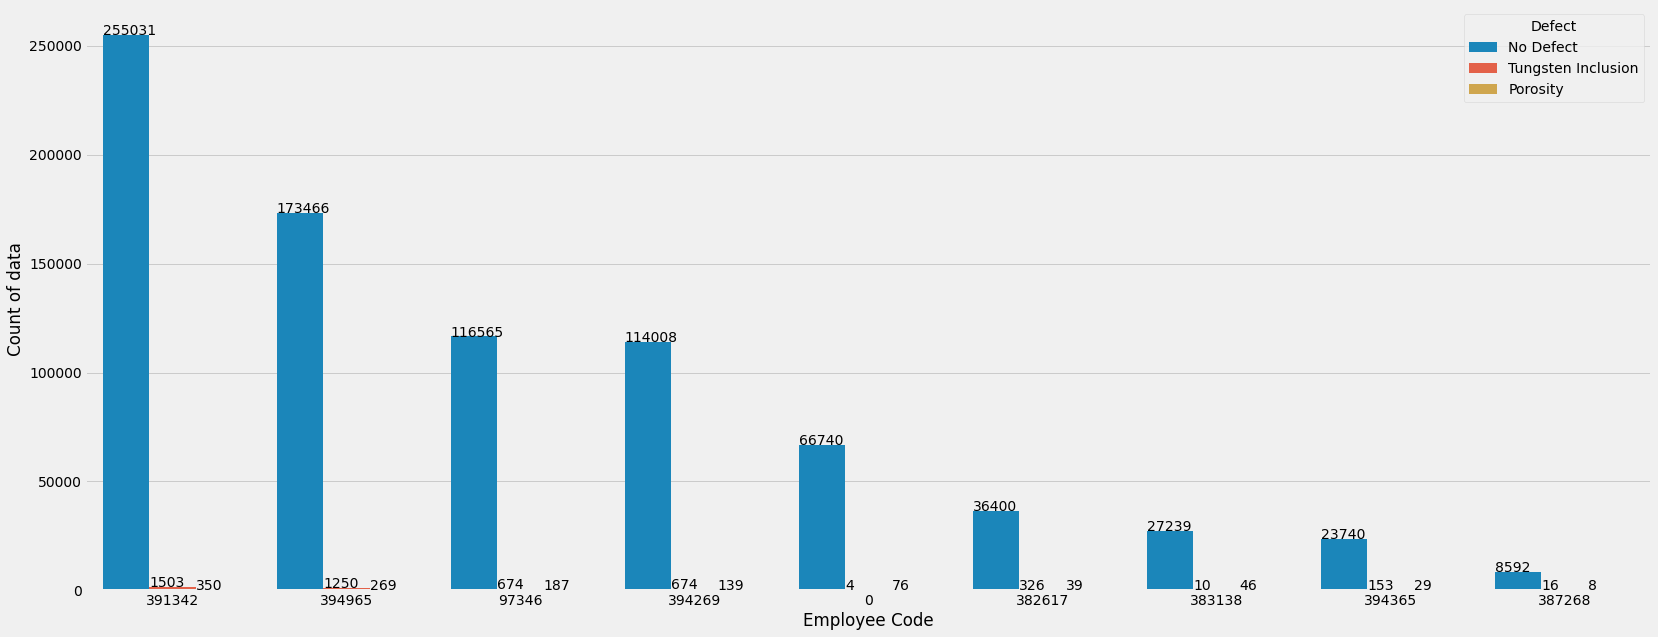

In [39]:
groupedvalues = groupedvalues = data.groupby('Employee Code').sum().reset_index()
fig = plt.figure(figsize = (25, 10))
g = sns.countplot(data = data,
            x = 'Employee Code',
            hue = 'Defect',
            order = data['Employee Code'].value_counts().index)
for p in g.patches:
   g.annotate('{}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+0.04))
plt.xlabel("Employee Code")
plt.ylabel("Count of data")
plt.show()

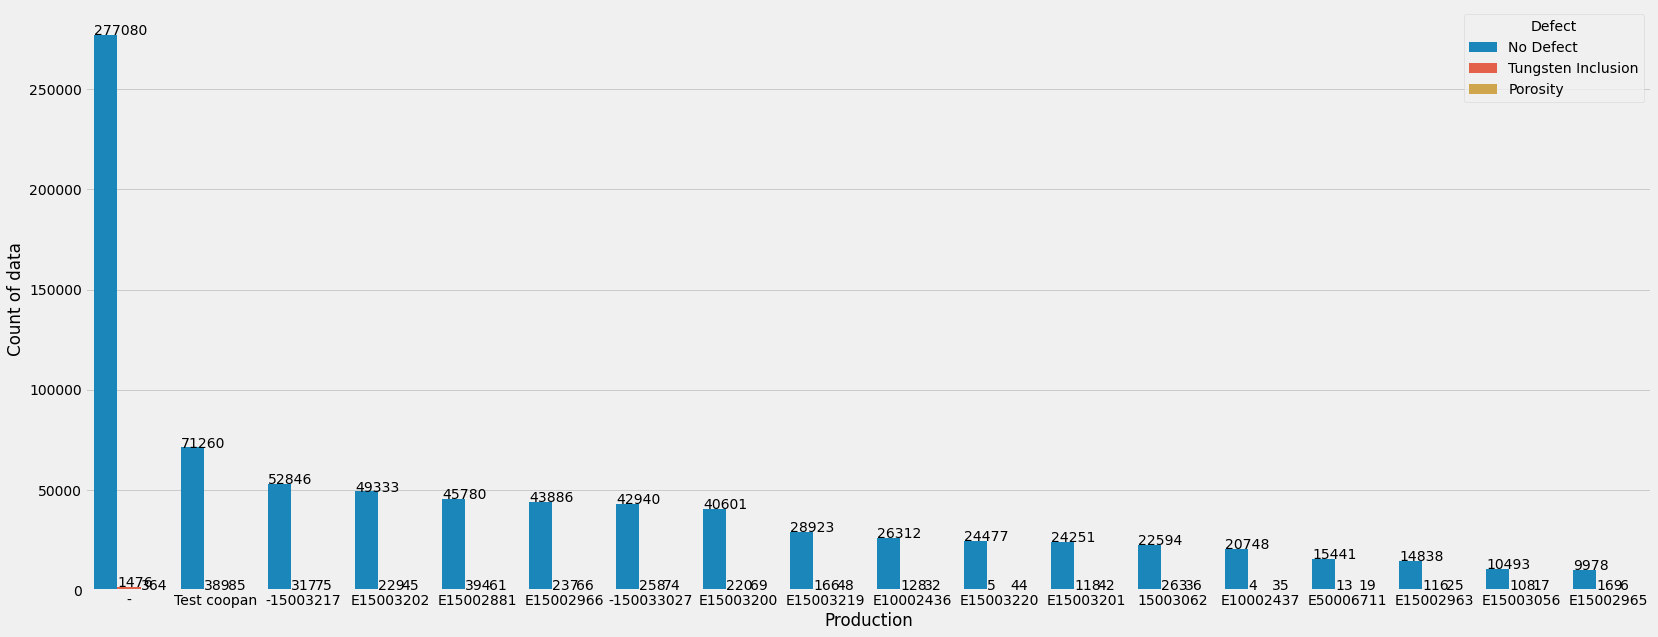

In [40]:
groupedvalues = groupedvalues = data.groupby('Production').sum().reset_index()
fig = plt.figure(figsize = (25, 10))
g = sns.countplot(data = data,
            x = 'Production',
            hue = 'Defect',
            order = data['Production'].value_counts().index)
for p in g.patches:
   g.annotate('{}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+0.04))
plt.xlabel("Production")
plt.ylabel("Count of data")
plt.show()

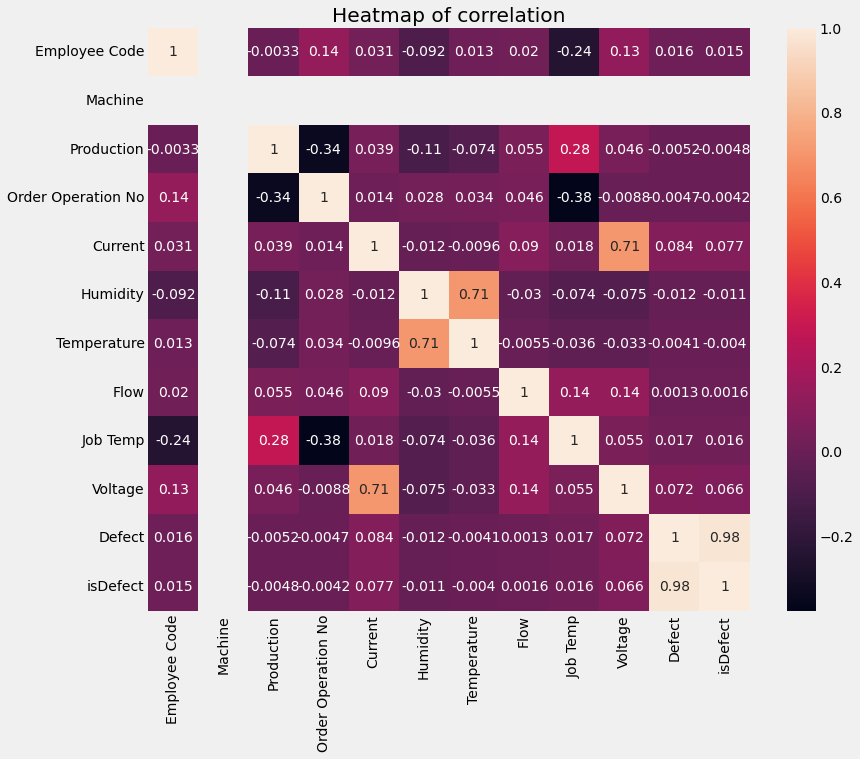

In [41]:
plt.figure(figsize=(12,10))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dat_heat = data
dat_heat['Machine'] = le.fit_transform(dat_heat['Machine'])
dat_heat['Production'] = le.fit_transform(dat_heat['Production'])
dat_heat['Defect'] = le.fit_transform(dat_heat['Defect'])
dat_heat['Order Operation No'] = le.fit_transform(dat_heat['Order Operation No'])

sns.heatmap(data=dat_heat.corr(),annot=True)
plt.title('Heatmap of correlation')
plt.show()

In [42]:
dat_heat.skew(axis = 0, skipna = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Employee Code         -1.425846
Machine                0.000000
Production             0.499780
Order Operation No    -0.649681
Current                1.683945
Humidity              54.298536
Temperature           61.372905
Flow                   0.857899
Job Temp               5.391676
Voltage                1.108705
Defect                12.502735
isDefect              11.868084
dtype: float64

## Feature Engineering 

In [43]:
data

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect
0,382617,0,8,4,2022-09-10,7:32:28:527,1.13,74,23,0.01,29.3,15.2,0,0
1,382617,0,8,4,2022-09-10,7:32:29:40,1.82,74,23,0.00,29.3,0.0,2,1
2,382617,0,8,4,2022-09-10,7:32:29:677,2.91,74,23,0.00,29.3,0.0,0,0
3,382617,0,8,4,2022-09-10,7:32:30:166,0.04,74,23,0.00,29.3,0.0,0,0
4,382617,0,8,4,2022-09-10,7:32:30:696,2.51,74,23,0.00,27.8,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827529,391342,0,3,4,2022-08-29,23:2:13:452,0.33,58,24,0.00,34.0,0.0,0,0
827530,391342,0,3,4,2022-08-29,23:2:14:46,0.34,58,24,0.00,34.0,0.0,0,0
827531,391342,0,3,4,2022-08-29,23:2:14:552,-0.86,58,24,0.06,34.0,0.0,0,0
827532,391342,0,3,4,2022-08-29,23:2:15:143,0.32,58,24,0.00,34.6,0.0,0,0


In [44]:
id_feats =['Employee Code', 'Machine', 'Production', 'Order Operation No']
data = data.drop(id_feats, axis= 1)
data

,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect
0,2022-09-10,7:32:28:527,1.13,74,23,0.01,29.3,15.2,0,0
1,2022-09-10,7:32:29:40,1.82,74,23,0.00,29.3,0.0,2,1
2,2022-09-10,7:32:29:677,2.91,74,23,0.00,29.3,0.0,0,0
3,2022-09-10,7:32:30:166,0.04,74,23,0.00,29.3,0.0,0,0
4,2022-09-10,7:32:30:696,2.51,74,23,0.00,27.8,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
827529,2022-08-29,23:2:13:452,0.33,58,24,0.00,34.0,0.0,0,0
827530,2022-08-29,23:2:14:46,0.34,58,24,0.00,34.0,0.0,0,0
827531,2022-08-29,23:2:14:552,-0.86,58,24,0.06,34.0,0.0,0,0
827532,2022-08-29,23:2:15:143,0.32,58,24,0.00,34.6,0.0,0,0


In [45]:
data['power'] = data['Current']*data['Voltage']
data

,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect,power
0,2022-09-10,7:32:28:527,1.13,74,23,0.01,29.3,15.2,0,0,17.176
1,2022-09-10,7:32:29:40,1.82,74,23,0.00,29.3,0.0,2,1,0.000
2,2022-09-10,7:32:29:677,2.91,74,23,0.00,29.3,0.0,0,0,0.000
3,2022-09-10,7:32:30:166,0.04,74,23,0.00,29.3,0.0,0,0,0.000
4,2022-09-10,7:32:30:696,2.51,74,23,0.00,27.8,0.0,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
827529,2022-08-29,23:2:13:452,0.33,58,24,0.00,34.0,0.0,0,0,0.000
827530,2022-08-29,23:2:14:46,0.34,58,24,0.00,34.0,0.0,0,0,0.000
827531,2022-08-29,23:2:14:552,-0.86,58,24,0.06,34.0,0.0,0,0,-0.000
827532,2022-08-29,23:2:15:143,0.32,58,24,0.00,34.6,0.0,0,0,0.000


In [46]:
## Is it day or night

def is_day(x):
    temp = int(x.split(':')[0])
    if temp<=18 and temp<=7 :
        return 1
    else:
        return 0
    
data['Is_Day'] = data['Time'].apply(is_day)
data

,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect,power,Is_Day
0,2022-09-10,7:32:28:527,1.13,74,23,0.01,29.3,15.2,0,0,17.176,1
1,2022-09-10,7:32:29:40,1.82,74,23,0.00,29.3,0.0,2,1,0.000,1
2,2022-09-10,7:32:29:677,2.91,74,23,0.00,29.3,0.0,0,0,0.000,1
3,2022-09-10,7:32:30:166,0.04,74,23,0.00,29.3,0.0,0,0,0.000,1
4,2022-09-10,7:32:30:696,2.51,74,23,0.00,27.8,0.0,0,0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
827529,2022-08-29,23:2:13:452,0.33,58,24,0.00,34.0,0.0,0,0,0.000,0
827530,2022-08-29,23:2:14:46,0.34,58,24,0.00,34.0,0.0,0,0,0.000,0
827531,2022-08-29,23:2:14:552,-0.86,58,24,0.06,34.0,0.0,0,0,-0.000,0
827532,2022-08-29,23:2:15:143,0.32,58,24,0.00,34.6,0.0,0,0,0.000,0


In [47]:
time_feats = ['Date', 'Time']
data = data.drop(time_feats, axis= 1)
data

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,isDefect,power,Is_Day
0,1.13,74,23,0.01,29.3,15.2,0,0,17.176,1
1,1.82,74,23,0.00,29.3,0.0,2,1,0.000,1
2,2.91,74,23,0.00,29.3,0.0,0,0,0.000,1
3,0.04,74,23,0.00,29.3,0.0,0,0,0.000,1
4,2.51,74,23,0.00,27.8,0.0,0,0,0.000,1
...,...,...,...,...,...,...,...,...,...,...
827529,0.33,58,24,0.00,34.0,0.0,0,0,0.000,0
827530,0.34,58,24,0.00,34.0,0.0,0,0,0.000,0
827531,-0.86,58,24,0.06,34.0,0.0,0,0,-0.000,0
827532,0.32,58,24,0.00,34.6,0.0,0,0,0.000,0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


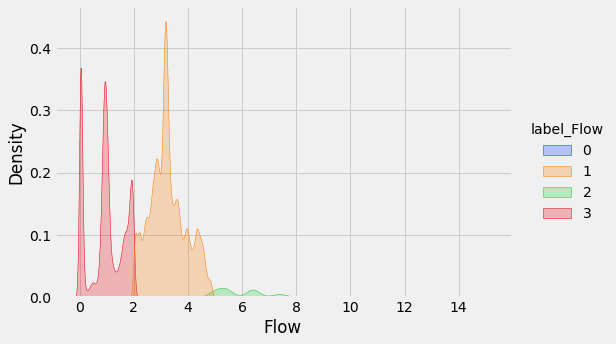

In [48]:
## Binning of Flow Column

from sklearn.mixture import GaussianMixture
n_components = 4
gmm = GaussianMixture( n_components = n_components )
 
# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(data['Flow'].values.reshape(-1,1))
 
# Assign a label to each sample
labels = gmm.predict(data['Flow'].values.reshape(-1,1))
data['label_Flow']= labels
# plot three clusters in same plot
sns.displot(data=data, x='Flow', hue='label_Flow', kind='kde', fill=True, palette=sns.color_palette('bright')[:n_components ], height=5, aspect=1.5)

In [49]:
## Checking Target Imbalance
import plotly.graph_objects as go

colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = data['isDefect'].value_counts()/data['isDefect'].shape[0]

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Outcome")
fig.show()

## Train-Test Split

In [50]:
target1 = data['Defect']
target2 = data['isDefect']

In [51]:
X = data.drop(['Defect','isDefect'],axis=1).values
y = target1

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=2084)

## Modelling

In [53]:
# xgb_params = {   'random_state':42,'scale_pos_weight': 8.416403785488958,'n_estimators':150,
#                 'early_stopping_rounds':300,'eval_metric':'auc','verbose':1000 , 
#                 'learning_rate': 0.0463581661788896,'reg_lambda': 1.8577901848649363,
#                 'reg_alpha': 8.487064649268152e-06,'subsample': 0.7256082597999299,
#                 'colsample_bytree': 0.8923416359976979,'max_depth': 6    }  
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
from sklearn.metrics import classification_report

xgbc = XGBClassifier() # scale_pos_weight = 1/142.8439075265079

xgbc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]], verbose=0)

y_test_preds_proba_xgbc = xgbc.predict_proba(x_test)
y_test_preds_xgbc = xgbc.predict(x_test)
print()
print('F1 Score   '+str(f1_score(y_test, y_test_preds_xgbc, average='weighted')))
print()
print("Classification report for Defect (0 - No Defect, 1 - Porosity Defect, 2 - Tungsten Inclusion Defect)\n")
print(classification_report(y_test, y_test_preds_xgbc))


F1 Score   0.9919867118751757

Classification report for Defect (0 - No Defect, 1 - Porosity Defect, 2 - Tungsten Inclusion Defect)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    123268
           1       0.00      0.00      0.00       171
           2       0.73      0.24      0.36       692

    accuracy                           0.99    124131
   macro avg       0.58      0.41      0.45    124131
weighted avg       0.99      0.99      0.99    124131



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [54]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()

cbc.fit(x_train,y_train,eval_set=(x_test,y_test),verbose=0)

y_test_preds_proba_cbc = cbc.predict_proba(x_test)
y_test_preds_cbc = cbc.predict(x_test)
print()   
print('F1 Score   '+str(f1_score(y_test, y_test_preds_cbc, average='weighted')))
print()
print("Classification report for Defect (0 - No Defect, 1 - Porosity Defect, 2 - Tungsten Inclusion Defect)\n")
print(classification_report(y_test, y_test_preds_cbc))


F1 Score   0.9918003060992558

Classification report for Defect (0 - No Defect, 1 - Porosity Defect, 2 - Tungsten Inclusion Defect)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    123268
           1       0.00      0.00      0.00       171
           2       0.72      0.22      0.33       692

    accuracy                           0.99    124131
   macro avg       0.57      0.40      0.44    124131
weighted avg       0.99      0.99      0.99    124131



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [55]:
import lightgbm as lgb
lgc = lgb.LGBMClassifier()


lgc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]],verbose=0)

y_test_preds_proba_lgc = lgc.predict_proba(x_test)
y_test_preds_lgc = lgc.predict(x_test)

print()
print('F1 Score   '+str(f1_score(y_test, y_test_preds_lgc, average='weighted')))
print()
print("Classification report for Defect (0 - No Defect, 1 - Porosity Defect, 2 - Tungsten Inclusion Defect)\n")
print(classification_report(y_test, y_test_preds_lgc))

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.




F1 Score   0.9911204394830062

Classification report for Defect (0 - No Defect, 1 - Porosity Defect, 2 - Tungsten Inclusion Defect)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    123268
           1       0.00      0.00      0.00       171
           2       0.56      0.17      0.26       692

    accuracy                           0.99    124131
   macro avg       0.52      0.39      0.42    124131
weighted avg       0.99      0.99      0.99    124131



In [56]:
from xgboost import XGBRFClassifier
xgbrf = XGBRFClassifier() # scale_pos_weight = 1/142.8439075265079

xgbrf.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]], verbose=0)

y_test_preds_proba_xgbrf = xgbrf.predict_proba(x_test)
y_test_preds_xgbrf = xgbrf.predict(x_test)
print()
print('F1 Score   '+str(f1_score(y_test, y_test_preds_xgbrf, average='weighted')))
print()
print("Classification report for Defect (0 - No Defect, 1 - Porosity Defect, 2 - Tungsten Inclusion Defect)\n")

print(classification_report(y_test, y_test_preds_xgbrf))


F1 Score   0.9920544526223459

Classification report for Defect (0 - No Defect, 1 - Porosity Defect, 2 - Tungsten Inclusion Defect)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    123268
           1       0.00      0.00      0.00       171
           2       0.72      0.25      0.37       692

    accuracy                           0.99    124131
   macro avg       0.57      0.42      0.46    124131
weighted avg       0.99      0.99      0.99    124131



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## XGBRFClassifier gives the best results.